# Generated Vs. Real Image Classification

By: Joe Sellett, Haiyan Cai, and Cole Wagner

## Data Preparation

In [50]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import (
    Activation,
    Add,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    MaxPooling2D,
    RandomContrast,
    RandomRotation,
)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import image_dataset_from_directory

tf.config.list_physical_devices("GPU")

[]

### Load Data

In [4]:
train_img, test_img = image_dataset_from_directory(
    directory="images",
    label_mode="binary",
    image_size=(32, 32),
    seed=7324,
    validation_split=0.2,
    subset="both",
)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.


## Modeling

### Model Architecture 1

In [29]:
cnn1 = Sequential()
# Data augmentation
cnn1.add(RandomContrast(factor=0.5, seed=7324))
cnn1.add(RandomRotation(factor=0.5, seed=7324))

# Convolutional layers
cnn1.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        padding="same",
    ),
)
cnn1.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        activation="relu",
    ),
)
cnn1.add(MaxPooling2D(pool_size=(2, 2)))

# Add some dropout for regularization
cnn1.add(Dropout(0.5))
# Flatten the output of the convolutional layers
cnn1.add(Flatten())
# Fully connected layers
cnn1.add(Dense(64, activation="relu"))
# Add some dropout for regularization
cnn1.add(Dropout(0.5))
# Output layer sigmoid for binary classification
cnn1.add(Dense(1, activation="sigmoid"))

In [30]:
cnn1.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

In [31]:
cnn1_history = cnn1.fit(
    train_img,
    epochs=5,
    verbose=1,
    validation_data=test_img,
)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - accuracy: 0.6852 - loss: 1.0724 - val_accuracy: 0.8070 - val_loss: 0.4204
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 89s 35ms/step - accuracy: 0.7600 - loss: 0.5343 - val_accuracy: 0.7998 - val_loss: 0.4552
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - accuracy: 0.7669 - loss: 0.5301 - val_accuracy: 0.8108 - val_loss: 0.4577
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 90s 36ms/step - accuracy: 0.7658 - loss: 0.5259 - val_accuracy: 0.8117 - val_loss: 0.4400
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - accuracy: 0.7608 - loss: 0.5292 - val_accuracy: 0.8236 - val_loss: 0.4526


In [33]:
def plot_acc_loss(history_obj: tf.keras.callbacks.History) -> None:
    """Plot the accuracy and loss of the model.

    Parameters
    ----------
    history_obj : History
        The history object returned by the fit method of the model.

    """
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history_obj.history["accuracy"], label="training")

    plt.ylabel("Accuracy %")
    plt.title("Training")
    plt.plot(history_obj.history["val_accuracy"], label="validation")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_obj.history["loss"], label="training")
    plt.ylabel("Training Loss")
    plt.xlabel("epochs")

    plt.plot(history_obj.history["val_loss"], label="validation")
    plt.xlabel("epochs")
    plt.title("Loss")
    plt.legend()
    plt.show()

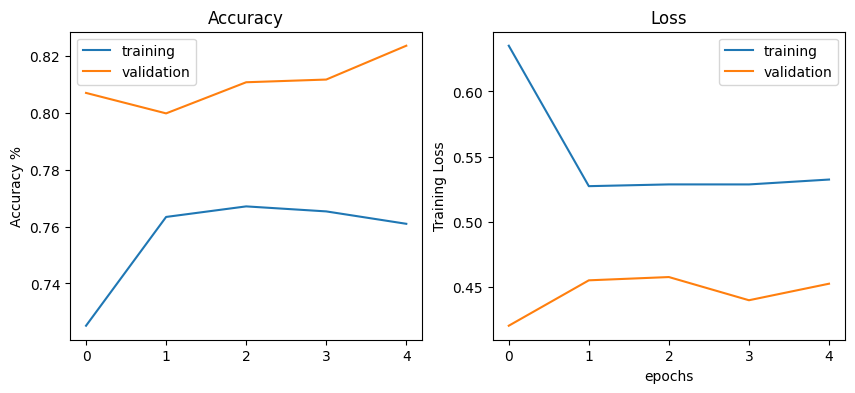

In [34]:
plot_acc_loss(cnn1_history)

In [ ]:
# cnn1.save("models/cnn1.keras")

In [35]:
cnn2 = Sequential()
# Data augmentation
cnn2.add(RandomContrast(factor=0.5, seed=7324))
cnn2.add(RandomRotation(factor=0.5, seed=7324))

# Convolutional layers
cnn2.add(
    Conv2D(
        filters=32,
        kernel_size=(2, 2),
        activation="relu",
        padding="same",
    ),
)
cnn2.add(
    Conv2D(
        filters=64,
        kernel_size=(2, 2),
        padding="same",
        activation="relu",
    ),
)
cnn2.add(MaxPooling2D(pool_size=(2, 2)))

# Add some dropout for regularization
cnn2.add(Dropout(0.5))
# Flatten the output of the convolutional layers
cnn2.add(Flatten())
# Fully connected layers
cnn2.add(Dense(32, activation="relu"))
# Add some dropout for regularization
cnn2.add(Dropout(0.5))
# Output layer sigmoid for binary classification
cnn2.add(Dense(1, activation="sigmoid"))

In [36]:
cnn2.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

In [37]:
cnn2_history = cnn2.fit(
    train_img,
    epochs=5,
    verbose=1,
    validation_data=test_img,
)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.5827 - loss: 2.0237 - val_accuracy: 0.7907 - val_loss: 0.4972
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.6900 - loss: 0.6022 - val_accuracy: 0.8130 - val_loss: 0.4662
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7449 - loss: 0.5490 - val_accuracy: 0.8256 - val_loss: 0.4307
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.7534 - loss: 0.5358 - val_accuracy: 0.8321 - val_loss: 0.4280
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7658 - loss: 0.5247 - val_accuracy: 0.8321 - val_loss: 0.4393


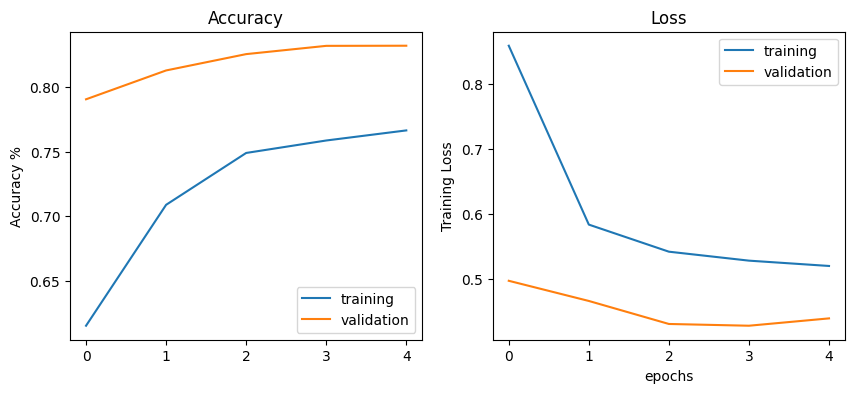

In [38]:
plot_acc_loss(cnn2_history)

In [ ]:
# cnn2.save("models/cnn2.keras")

In [45]:
cnn3 = Sequential()
# Data augmentation
cnn3.add(RandomContrast(factor=0.5, seed=7324))
cnn3.add(RandomRotation(factor=0.5, seed=7324))

# Convolutional layers
cnn3.add(
    Conv2D(
        filters=32,
        kernel_size=(1, 1),
        activation="relu",
        padding="same",
    ),
)
cnn3.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        activation="relu",
    ),
)
cnn3.add(MaxPooling2D(pool_size=(2, 2)))

# Add some dropout for regularization
cnn3.add(Dropout(0.5))
# Flatten the output of the convolutional layers
cnn3.add(Flatten())
# Fully connected layers
cnn3.add(Dense(32, activation="relu"))
# Add some dropout for regularization
cnn3.add(Dropout(0.5))
# Output layer sigmoid for binary classification
cnn3.add(Dense(1, activation="sigmoid"))

In [46]:
cnn3.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

In [47]:
cnn3_history = cnn3.fit(
    train_img,
    epochs=5,
    verbose=1,
    validation_data=test_img,
)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.5930 - loss: 3.2778 - val_accuracy: 0.7853 - val_loss: 0.5188
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.7116 - loss: 0.5819 - val_accuracy: 0.8155 - val_loss: 0.4399
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.7416 - loss: 0.5598 - val_accuracy: 0.8231 - val_loss: 0.4396
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.7532 - loss: 0.5441 - val_accuracy: 0.8210 - val_loss: 0.4176
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.7480 - loss: 0.5468 - val_accuracy: 0.8338 - val_loss: 0.4046


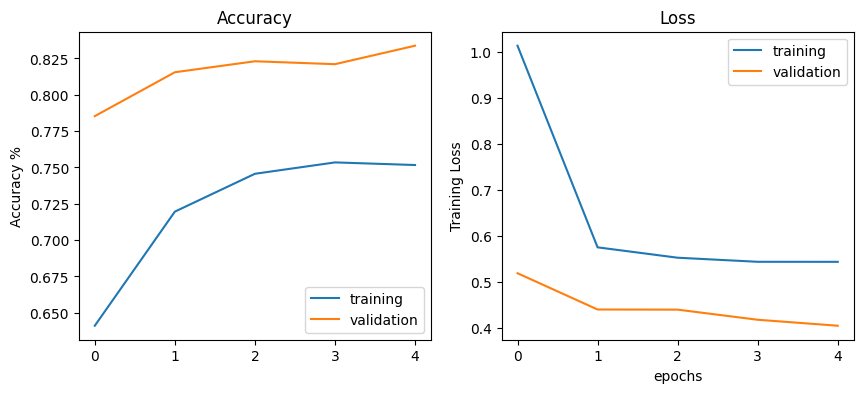

In [48]:
plot_acc_loss(cnn3_history)

In [ ]:
# cnn3.save("models/cnn3.keras")

### Model Architecture 2

In [64]:
input_holder = Input(shape=(32, 32, 3))

# Data augmentation
x = RandomContrast(factor=0.5, seed=7324)(input_holder)
x = RandomRotation(factor=0.5, seed=7324)(x)

# start with a conv layer
x = Conv2D(
    filters=32,
    kernel_size=(2, 2),
    padding="same",
    activation="relu",
)(x)

x_split = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    activation="relu",
)(x_split)

x = Conv2D(
    filters=64,
    kernel_size=(2, 2),
    padding="same",
    activation="relu",
)(x)

x = Conv2D(
    filters=32,
    kernel_size=(1, 1),
    padding="same",
    activation="relu",
)(x)

# Add split back in
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(128)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)
x = Activation("sigmoid")(x)

resnet1 = Model(inputs=input_holder, outputs=x)

In [65]:
resnet1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [66]:
resnet1_history = resnet1.fit(
    train_img,
    batch_size=32,
    epochs=5,
    verbose=1,
    validation_data=test_img,
)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.6255 - loss: 2.3747 - val_accuracy: 0.7785 - val_loss: 0.4679
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.7455 - loss: 0.5187 - val_accuracy: 0.8274 - val_loss: 0.3891
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.7652 - loss: 0.4930 - val_accuracy: 0.8530 - val_loss: 0.3531
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.7811 - loss: 0.4724 - val_accuracy: 0.8530 - val_loss: 0.3364
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.7890 - loss: 0.4574 - val_accuracy: 0.8736 - val_loss: 0.3211


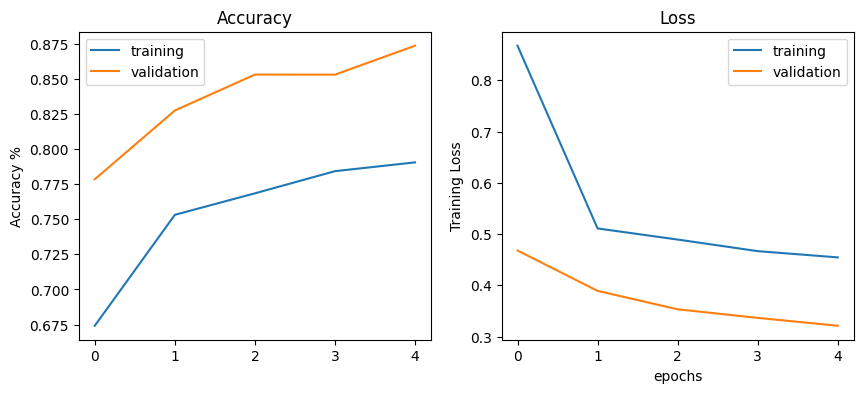

In [67]:
plot_acc_loss(resnet1_history)

In [ ]:
# resnet1.save("models/resnet1.keras")

In [73]:
input_holder = Input(shape=(32, 32, 3))

# Data augmentation
x = RandomContrast(factor=0.5, seed=7324)(input_holder)
x = RandomRotation(factor=0.5, seed=7324)(x)

# start with a conv layer
x = Conv2D(
    filters=32,
    kernel_size=(2, 2),
    padding="same",
    activation="relu",
)(x)

x_split = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(
    filters=32,
    kernel_size=(1, 1),
    padding="same",
    activation="relu",
)(x_split)

x = Conv2D(
    filters=32,
    kernel_size=(2, 2),
    padding="same",
    activation="relu",
)(x)

x = Conv2D(
    filters=32,
    kernel_size=(1, 1),
    padding="same",
    activation="relu",
)(x)

# Add split back in
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)
x = Activation("sigmoid")(x)

resnet2 = Model(inputs=input_holder, outputs=x)

In [74]:
resnet2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [75]:
resnet2_history = resnet2.fit(
    train_img,
    batch_size=32,
    epochs=5,
    verbose=1,
    validation_data=test_img,
)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.6544 - loss: 2.5980 - val_accuracy: 0.8145 - val_loss: 0.4094
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.7533 - loss: 0.5060 - val_accuracy: 0.8447 - val_loss: 0.3686
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.7768 - loss: 0.4666 - val_accuracy: 0.8655 - val_loss: 0.3326
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.7947 - loss: 0.4397 - val_accuracy: 0.8630 - val_loss: 0.3232
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8072 - loss: 0.4230 - val_accuracy: 0.8720 - val_loss: 0.3327


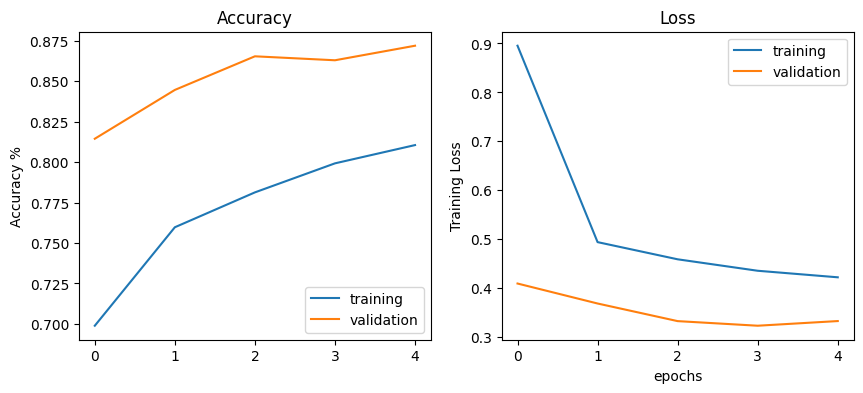

In [76]:
plot_acc_loss(resnet2_history)

In [ ]:
# resnet2.save("models/resnet2.keras")